## Exploratory Data Analysis(EDA) on the proportion of women to men representation in City-Owned Buildings in San Francisco

In October of 2018, the Board of Supervisors passed and Mayor London N. Breed signed, the Ordinance 243-18 (http://bit.ly/2LSqS3U) to expand the extent to which women are represented in the public sphere, including within artwork, statues, street names, facilities, parks, and more. The representation of women in City-owned buildings includes buildings, conference rooms, clubhouses, museums, recreation centers, community rooms, auditoriums, terminals, departure halls, 7 staircases, rooms, and other places open to the public. The City Administrator's office was responsible for compiling a list of all city owned buildings named after a man or woman. You can read the accompanying report on the representation of women in city property here: http://bit.ly/2YIDCz7


In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#reading the csv file into a dataframe
data = pd.read_csv('dataset\WomenRepresentaionInCityProperty-SanFrancisco.csv')


In [4]:
#printing the first five rows
data.head()


,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,City Administrator,NaN,4,10,36,21,21
1,Administrator,Maxine Hall Health Center,NaN,F,Public Health,NaN,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,NaN,park,4,10,36,21,21
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F,NaN,facilities and other amenities,4,10,36,21,21
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M,NaN,facilities and other amenities,4,10,36,21,21


In [5]:
#information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Department/Source             82 non-null     object
 1   Name                          82 non-null     object
 2   Person                        81 non-null     object
 3   Gender                        82 non-null     object
 4   Reference                     54 non-null     object
 5   Comments                      32 non-null     object
 6   Current Police Districts      82 non-null     int64 
 7   Current Supervisor Districts  82 non-null     int64 
 8   Analysis Neighborhoods        82 non-null     int64 
 9   Neighborhoods                 82 non-null     int64 
 10  SF Find Neighborhoods         82 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 7.2+ KB


The Reference and Comments columns contain a lot of missing data but cannot be dropped, as we have a small dataset. We can not also perform imputation because these are actual places and we might distort facts about these places.

In [6]:
#summary statistics
data.describe(include="all")

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,82,82,81,82,54,32,82.0,82.0,82.0,82.0,82.0
unique,8,82,69,5,21,13,NaN,NaN,NaN,NaN,NaN
top,Administrator,J. Woods Cable Car Carpentry Shop,George R. Moscone,M,Municipal Transportation Agency,facilities and other amenities,NaN,NaN,NaN,NaN,NaN
freq,46,1,6,53,9,11,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0


In [7]:
#counting the number of buildings owned by each gender
data['Gender'].value_counts()


M        53
F        19
F & M     8
M & F     1
M & M     1
Name: Gender, dtype: int64

Some buildings are co-owned by both male and female(F & M), (M & F), there is a building co-owned by both males (M & M).


In [8]:
#the buildings owned by both male and female
data[(data['Gender'] == 'F & M') | (data['Gender'] == 'M & F')] 

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
5,Administrator,Priscilla Chan and Mark Zuckerberg San Francis...,Priscilla Chan and Mark Zuckerberg,F & M,Public Health,NaN,4,10,36,21,21
7,REC AND PARKS,Minnie & Lovie Ward Recreation Center,Minnie & Lovie Ward,F & M,NaN,park,4,10,36,21,21
26,Administrator,Charlotte and George Shultz Horseshoe Drive,Charlotte and George Shultz,F & M,War Memorial Opera House,NaN,4,10,36,21,21
30,Administrator,Walter and Elise Haas Grand Lounge,Walter and Elise Hass,M & F,Davies Symphony Hall,NaN,4,10,36,21,21
34,LIBRARY,Syncip Family Conference Room,Syncip Family,F & M,NaN,4th floor,4,10,36,21,21
56,LIBRARY,Koret Auditorium,Koret (Family?),F & M,NaN,Family,4,10,36,21,21
64,LIBRARY,Fulton Conference Room,Fulton (family?),F & M,NaN,Family,4,10,36,21,21
65,Administrator,Dianne and Tab Taube Atrium Theatre,Dianne and Tab Taube,F & M,Veterans Building,NaN,4,10,36,21,21
66,REC AND PARKS,Thelma and Henry Doelger Primate Discovery Cen...,Thelma and Henry Doelger,F & M,NaN,facilities and other amenities,4,10,36,21,21


In [9]:
#counting the number of buildings owned by each gender
data['Gender'].value_counts(normalize=True)

M        0.646341
F        0.231707
F & M    0.097561
M & F    0.012195
M & M    0.012195
Name: Gender, dtype: float64

These nine buildings form 10% of our dataset and will be dropped as they do not distinctly represent male or female. Most of the buildings represent families or husband and wife. The M & M building will be taken to represent male gender M.

In [10]:
data = data[(data['Gender'] == 'F') | (data['Gender'] == 'M')]
data['Gender'] = data['Gender'].replace('M & M', 'M')

In [11]:
data['Gender'].value_counts()

M    53
F    19
Name: Gender, dtype: int64

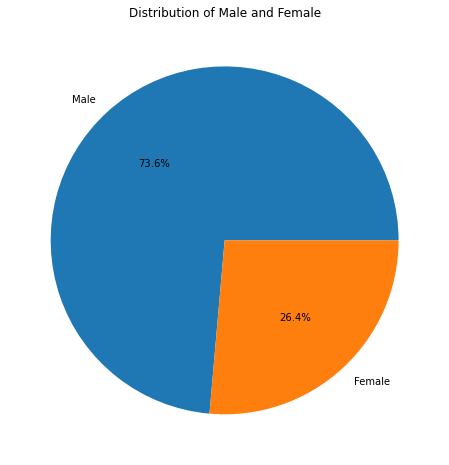

In [12]:
#plotting a pie chart to show the distribution between male and female
plt.figure(figsize=(12,8))
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], autopct="%0.1f%%")
plt.title("Distribution of Male and Female")
plt.show()




74% of the buildings are named after males and only 26% named after females. This doesnt portray a great representation of females.

### Departments and Female-Named Buildings

In [13]:
rep_in_departments = data.groupby(['Department/Source', 'Gender']).Name.count()
rep_in_departments

Department/Source  Gender
AIRPORT            M          1
Administrator      F         10
                   M         31
LIBRARY            F          2
                   M          3
PUC                M          2
Port               F          1
                   M          1
REC AND PARKS      F          5
                   M         10
RED                F          1
                   M          2
SFMTA              M          3
Name: Name, dtype: int64

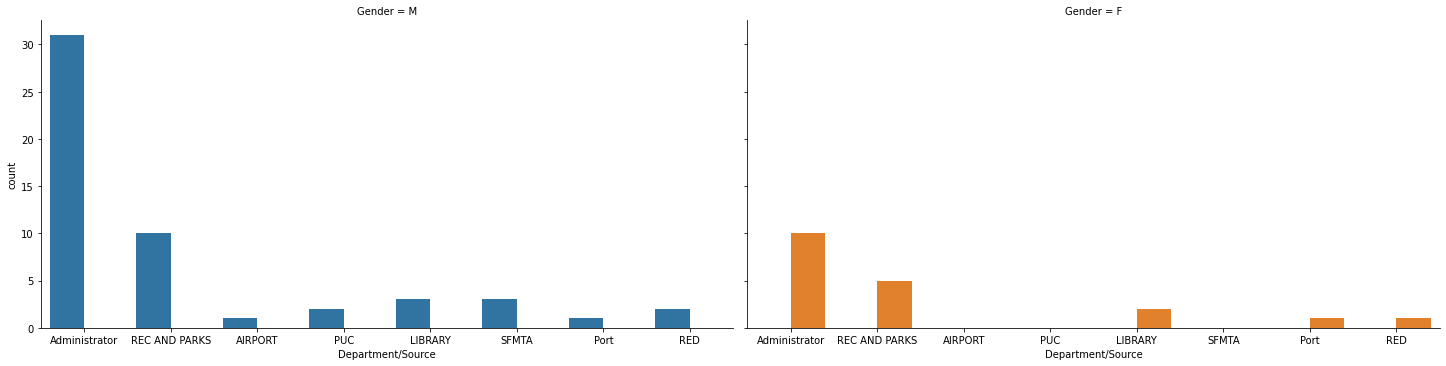

In [19]:

sns.catplot(data=data, x='Department/Source', col='Gender', hue='Gender', kind='count', aspect=2)
plt.show()

Departments such as AIRPORT, PUC, SFMTA do not have buildings named after females. The Administrator Departments boasts the highest female named buildings with 10. REC AND PARKS has 5, LIBRARY 2, Port and RED with one each. 

### Referenced by and Female-Named Buildings

In [22]:
data['Reference'].value_counts()

Municipal Transportation Agency                                                      9
City Administrator                                                                   8
Public Utilities Commission                                                          4
Veterans Building                                                                    3
Public Health                                                                        3
Airport (Sfo)                                                                        3
Public Works                                                                         2
Public Library                                                                       2
Davies Symphony Hall                                                                 2
Port                                                                                 2
Harding Golf Course                                                                  1
Fine Arts Museums                          

In [21]:
data_female = data[data['Gender'] == 'F']
data_female['Reference'].value_counts()

Veterans Building                  2
War Memorial Opera House           1
Municipal Transportation Agency    1
Arts Commission                    1
Davies Symphony Hall               1
Public Health                      1
Public Library                     1
Public Works                       1
City Administrator                 1
Port                               1
Name: Reference, dtype: int64

Of the 21 References, only 10 references were female named buildings. 

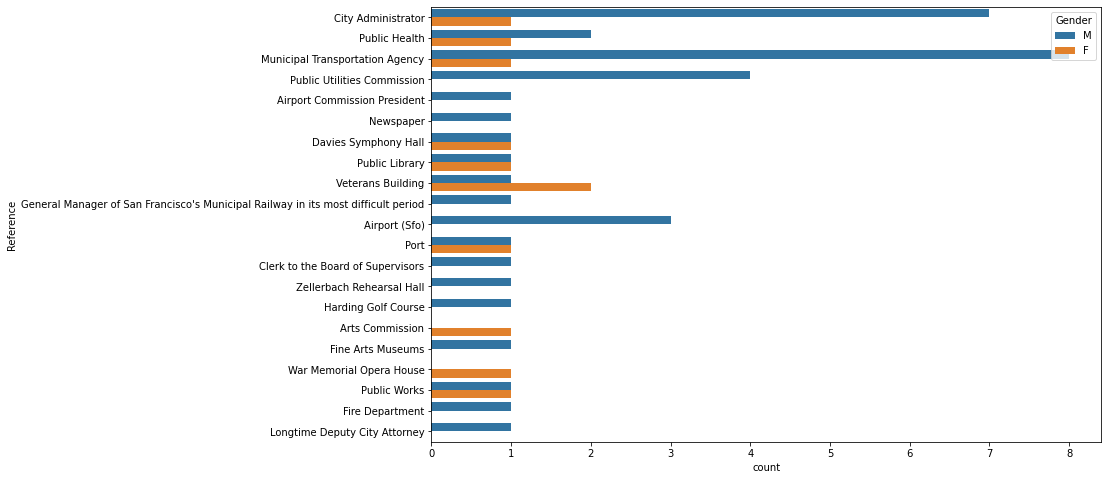

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(y='Reference', hue='Gender', data=data)
plt.show()

### Comments and Female-Named Buildings

In [31]:
data_female['Comments'].value_counts()

facilities and other amenities                                                                     3
park                                                                                               2
2010 - Chief of Protocol for the City and County of San Francisco (and the State of California)    1
1st floor main library                                                                             1
Library                                                                                            1
Name: Comments, dtype: int64

In [32]:
data['Comments'].value_counts()

facilities and other amenities                                                                     10
park                                                                                                5
Library                                                                                             3
Not in SF Data                                                                                      2
Different name in SF Data                                                                           1
1st floor main library                                                                              1
Civil Rights Attorney                                                                               1
Civil Engineer, Developed Hetch-Hetchy Water System                                                 1
main library 3rd Floor                                                                              1
2010 - Chief of Protocol for the City and County of San Francisco (and the State o

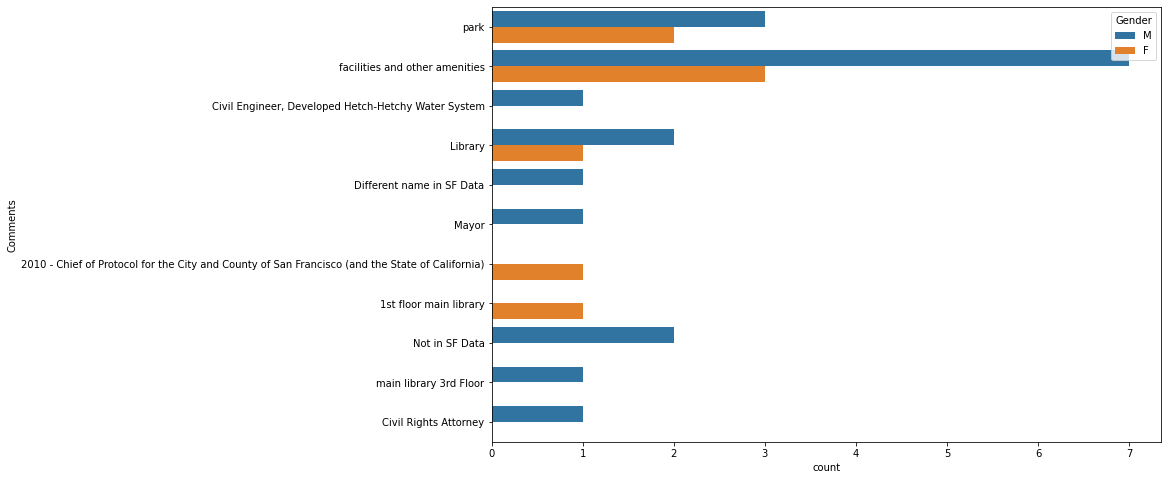

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(y='Comments', hue='Gender', data=data)
plt.show()

The comments on female-named buildings are mostly facilities and other amenities or park. We can not really point out so much about where female-named buildings due to the small size of comments gotten. 

### Conclusions

- Most buildings in San Franciso are named after men. 
- The females are not well represented at all.